In [ ]:
pip install numpy pandas matplotlib tensorflow keras

In [9]:
import numpy as np
import cv2
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from google.colab import files
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
model.save('mnist_cnn.h5')
model = load_model('mnist_cnn.h5')

Epoch 1/10
300/300 - 3s - loss: 0.3440 - accuracy: 0.8969 - val_loss: 0.0673 - val_accuracy: 0.9783 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1048 - accuracy: 0.9687 - val_loss: 0.0460 - val_accuracy: 0.9848 - 2s/epoch - 5ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0752 - accuracy: 0.9782 - val_loss: 0.0374 - val_accuracy: 0.9879 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0626 - accuracy: 0.9813 - val_loss: 0.0319 - val_accuracy: 0.9900 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0290 - val_accuracy: 0.9908 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0305 - val_accuracy: 0.9897 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0300 - val_accuracy: 0.9900 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0253 - val_accuracy: 0.9921 - 1s/epoch - 5ms/step
Epoch 9/10
300/300 - 1s

Saving Screenshot 2024-06-23 144129.png to Screenshot 2024-06-23 144129 (1).png
1/1 [==============================] - 0s 62ms/step
Predicted Digit: 2


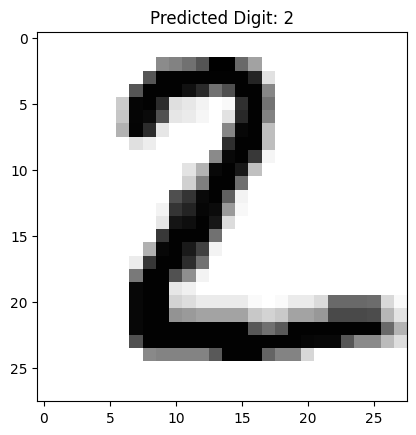

In [10]:
uploaded = files.upload()
image_filename = list(uploaded.keys())[0]
img_data = uploaded[image_filename]
img = cv2.imdecode(np.frombuffer(img_data, np.uint8), cv2.IMREAD_GRAYSCALE)
if img is None:
    print(f"Error: Could not load image. Please check the file.")
    exit()
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img / 255.0
img = img.reshape(1, 28, 28, 1)
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f'Predicted Digit: {predicted_digit}')
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()
